In [1]:
from keras.datasets import boston_housing
from keras.datasets import reuters
import numpy as np
import os
from keras.models import Sequential
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
import time
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from utils import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import *
from keras.optimizers import Adam,RMSprop
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
import jieba
from keras import layers, Input
from keras.models import Model
import seaborn as sns

Using TensorFlow backend.


In [3]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度_20群.xls',encoding='utf-16')
df = df.loc[:, ["age","serveTime","credLimit","Loan","SalPerY","holdCard","Career","credLimit_group"]] 
df =df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    )
df["credLimit_group"] = df["credLimit_group"].astype(int)
print(df.shape)
print(df.info())

(1680, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1686
Data columns (total 8 columns):
age                1680 non-null float64
serveTime          1680 non-null float64
credLimit          1680 non-null int64
Loan               1680 non-null float64
SalPerY            1680 non-null int64
holdCard           1680 non-null int64
Career             1680 non-null int64
credLimit_group    1680 non-null int32
dtypes: float64(3), int32(1), int64(4)
memory usage: 111.6 KB
None


In [4]:
df1 = df.loc[:,["age","serveTime","holdCard","Loan","SalPerY","Career"]]
df=df1

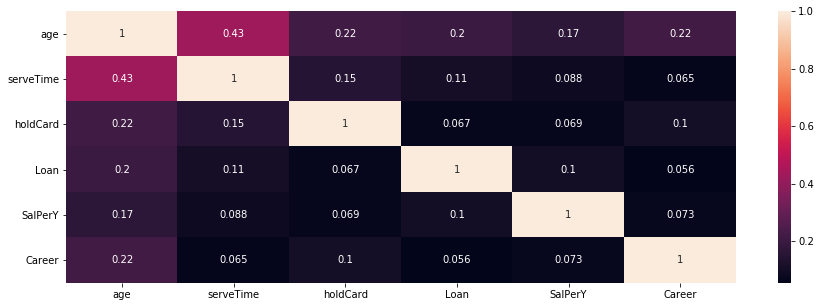

In [5]:
# 作法一
corrmat = df.corr()
high_corr_columns_final = corrmat.index[abs(corrmat["serveTime"])>0]

plt.figure(figsize=(15,5))
g = sns.heatmap(df[high_corr_columns_final].corr(),annot=True)

In [11]:
#做法2.VIF 一般認為去除10以上的即可
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
cc = sp.corrcoef(df, rowvar=False)
VIF = np.linalg.inv(cc)
print(VIF.diagonal())

[1.36405944 1.23158597 1.05891104 1.04795868 1.03672977 1.05668259]


In [19]:
# 參考https://github.com/guilhermevescovi/House-Prices-Advanced-Regression-Techniques/blob/master/version_final_3_best_keras.ipynb

# 並無共線性問題